# Working with HTML Pages

## Parsing XML and HTML

In [11]:
from lxml import objectify
import pandas as pd
from distutils import util

xml = objectify.parse(open('dataset_toy/XMLData.xml'))
root = xml.getroot()
# creating an empty df with only 2 columns
df = pd.DataFrame(columns=('Number', 'Boolean'))

for i in range(0, 4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'Boolean'], 
                   # make the items in the column 0 as its
                   # original datatype, which is integer
                   [obj[0].pyval, 
                    # change the datatype of the items in 
                    # the column 2 from str to boolean
                    # using strtobool() in distutil.util. which will
                    # output 0 and 1, then it will converted
                    # into a boolean value by bool()
                    bool(util.strtobool(obj[2].text))]))
    row_s = pd.Series(row)
    # assigning items in column 1 as the name of each
    # respective row
    row_s.name = obj[1].text
    df = df.append(row_s)

print(df)
# checking datatype of each items in the 'First' row 
# by using loc() to locate a certain row and column
print(type(df.loc['First']['Number']))
print(type(df.loc['First']['Boolean']))

       Number Boolean
First       1    True
Second      2   False
Third       3    True
Fourth      4   False
<class 'int'>
<class 'bool'>


## Using Xpath for data extraction 

In [63]:
from lxml import objectify
import pandas as pd
from distutils import util

xml = objectify.parse(open('dataset_toy/XMLData.xml'))
root = xml.getroot()

# because all XML file entries are strings, use map() to convert it
# the xpath() accept a path from the root node (Record) to the data you need
# this one is straight-forward as it is
map_number = map(int, root.xpath('Record/Number'))
# convert the data into a string
map_bool = map(str, root.xpath('Record/Boolean'))
# convert it into a 0 and 1
map_bool = map(util.strtobool, map_bool)
# and, finally convert it to boolean value
map_bool = map(bool, map_bool)
# convert the data into string
map_string = map(str, root.xpath('Record/String'))

# pairing map_number and map_bool into a tuple
data = list(zip(map_number, map_bool))

# make a df with data as data, columns and list of map_string as index
df = pd.DataFrame(data, 
                  columns=('Number', 'Boolean'),
                  index = list(map_string)
                 )

print(df)
print(type(df.loc['First']['Number']))
print(type(df.loc['First']['Boolean']))

        Number  Boolean
First        1     True
Second       2    False
Third        3     True
Fourth       4    False
<class 'numpy.int64'>
<class 'numpy.bool_'>


# Working with Raw Text 

## Dealing with Unicode (standard encoding e.g. UTF-8) 

## Stemming and removing stop words

In [86]:
from sklearn.feature_extraction.text import *
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer


stemmer = PorterStemmer()

# make a function to accept tokens and stemmer as the arguments
def stem_tokens(tokens, stemmer):
    # create a blank list
    stemmed = []
    # use a for loop
    for i in tokens:
        # stem the word i from tokens list
        # and decide whether if its a 
        stemmed.append(stemmer.stem(i))
    # returnong the stemmed list
    return stemmed

# make a fucntion to tokenize (splt the word) the text in to a list
def tokenize(text):
    # using word_tokenize() to split each word between a space in a text
    tokens = word_tokenize(text)
    # stemming the tokenized text
    stems = stem_tokens(tokens, stemmer)
    # return the stems
    return stems

# defining a text which later will be the vacal reference to the
# tested sentence
vocab = ['Sam loves swimming so he swims all the time']
# create a countvectorizer to hold a list of stemmed words but
# wothout the stop words
vect = CountVectorizer(tokenizer=tokenize, stop_words='english')

# fitting the vocab variable with the count vectorizer
# and add the vocab into another countvectorizer vec
vec = vect.fit(vocab)

# using countvectorizer vec to transform a text
sentence1 = vec.transform(['''
                            George loves swimming too and
                            he likes to swim in the lake
                            at the night time
                            !'''])
# displaying all of the stemmed words from vec
print(vec.get_feature_names())
# displaying how many time a certain stemmed words from Countvectorizer
# appears in the text
print(sentence1.toarray())

['love', 'sam', 'swim', 'time']
[[1 0 2 1]]


## Introducing regular expressions

In [2]:
import re

# the data that will be processed through a certain
# regular expression parsing pattern
data1 = 'My phne number is: 800-555-1212.'
data2 = '800-555-1234 is my phone number.'

# making the pattern to extract only the phone number
pattern = re.compile(r'(\d{3})-(\d{3})-(\d{4})')

# applying the pattern to the data
dmatch1 = pattern.search(data1).groups()
dmatch2 = pattern.search(data2).groups()

print(dmatch1)
print(dmatch2)

('800', '555', '1212')
('800', '555', '1234')


# Using the Bag of Words Model and Beyond

## Understanding the bag of words model 

In [36]:

# calling fetch_20newsgroups and loading the dataset into memory
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

# list of the newsgroups we will use to train the algorithm
categories = ['comp.graphics', 'misc.forsale',
              'rec.autos', 'sci.space']

# using fetch_20newsgroup to make a bunch (dict-like object)
# which is to make bag of words
# subset='train', to determine the dataset for training set
# categories, which categories are used
# shuffle, whether or not shuffle the data
# Determines random number generation for dataset shuffling
twenty_train = fetch_20newsgroups(subset='train',
                                 categories=categories,
                                 shuffle=True,
                                 random_state=42)

print(list(twenty_train))

# make a CountVectorizer to tokenize the data in this case words
# (every single word that is in the text)
count_vect = CountVectorizer()
#  placing the resulting bag of words into X_train_counts
X_train_counts = count_vect.fit_transform(twenty_train.data)

# displaying the number of entries 
#(number of sample/documnet, number of words)
print("Bow Shape:", X_train_counts.shape)
# finding the index of word 'caltech'
caltech_idx = count_vect.vocabulary_['caltech']
# displaying how many word 'caltech' appear in the first document
print(f"Caltech: {X_train_counts[0, caltech_idx]}")

['data', 'filenames', 'target_names', 'target', 'DESCR']
Bow Shape: (2356, 34750)
33888
Caltech: 1


## Working with n-grams 

In [55]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *
import numpy as np

print(x_train_count[x_train_count>0])

categories = ['sci.space']

twenty_train = fetch_20newsgroups(subset='train', 
                                  categories=categories,
                                  remove=('headers',
                                          'footers',
                                          'quotes'),
                                  shuffle=True,
                                  random_state=42)
                              # choose an analyzer  
count_chars = CountVectorizer(analyzer='char_wb',
                              # set ngram-range to 3x3
                              ngram_range=(3,3),
                              # set the max feature that will be returned
                              max_features=10)

'''print(list(twenty_train['data']))'''


count_chars.fit(twenty_train['data'])
                            # choose an analyzer  
count_words = CountVectorizer(analyzer='word',
                              # set ngram-range to 2x2
                              ngram_range=(2,2),
                              # set the max feature that will be returned
                              max_features=10,
                              stop_words='english')

count_words.fit(twenty_train['data'])

X = count_chars.transform(twenty_train.data)

#  showing the top ten trigrams(3x3) for characters from the document
print(count_chars.get_feature_names())
# It shows the frequency of the top ten trigrams in the first document
print(X[1].todense())
#  showing the top ten bigrams(2s2) for words from the document
print(count_words.get_feature_names())



[' an', ' in', ' of', ' th', ' to', 'he ', 'ing', 'ion', 'nd ', 'the']
[[0 0 2 5 1 4 2 2 0 5]]
['anonymous ftp', 'commercial space', 'gamma ray', 'nasa gov', 'national space', 'remote sensing', 'sci space', 'space shuttle', 'space station', 'washington dc']


## Implementing TF-IDF transformations

In [100]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['comp.graphics', 'misc.forsale', 
              'rec.autos', 'sci.space']

twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories,
                                  shuffle=True,
                                  random_state=42)

count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(twenty_train.data)

# make matrix of TF-IDF features that fits the newsgroup
tfidf = TfidfTransformer().fit(X_train_count)
# the vectoried data then transform into an TF-IDF matrix(?)
X_train_tfidf = tfidf.transform(X_train_count)

caltech_idx = count_vect.vocabulary_['caltech']

print('"Caltech" scored in a BOW(Bag of Words): ')
# printing the word 'caltech' in all document it appeard
print(f'Count: {X_train_count[:, caltech_idx]}')
#printing the TF-IDF value from word 'caltech' in all document it appeared
print(f'TF-IDF: {X_train_tfidf[:, caltech_idx]}')



"Caltech" scored in a BOW(Bag of Words): 
Count:   (0, 0)	3
  (160, 0)	3
  (175, 0)	2
  (385, 0)	3
  (475, 0)	3
  (543, 0)	4
  (624, 0)	2
  (768, 0)	2
  (775, 0)	2
  (790, 0)	2
  (881, 0)	3
  (914, 0)	1
  (1049, 0)	1
  (1181, 0)	4
  (1321, 0)	4
  (1446, 0)	1
  (1456, 0)	2
  (1488, 0)	2
  (1591, 0)	1
  (1594, 0)	2
  (1664, 0)	2
  (1699, 0)	2
  (1865, 0)	1
  (1881, 0)	5
  (1925, 0)	1
  (1953, 0)	2
  (2199, 0)	2
  (2237, 0)	1
  (2322, 0)	2
  (2337, 0)	2
TF-IDF:   (0, 0)	0.12271514186360297
  (160, 0)	0.17242587691544567
  (175, 0)	0.06027613138583139
  (385, 0)	0.01442628710428488
  (475, 0)	0.15247092091614056
  (543, 0)	0.3570092978244947
  (624, 0)	0.14661951181237493
  (768, 0)	0.15714749779657694
  (775, 0)	0.13382020773206885
  (790, 0)	0.14802502938764878
  (881, 0)	0.23383380888439048
  (914, 0)	0.020664372917934555
  (1049, 0)	0.07730701864585837
  (1181, 0)	0.23630966590676772
  (1321, 0)	0.2563368406634746
  (1446, 0)	0.051749310045427266
  (1456, 0)	0.15485459265081006
  (1488

### Compute the average word count and average TF-IDF

In [99]:
import numpy as np

# list all of the number of a word that appears in all of the text
count = X_train_count[X_train_count>0]
# list all of the value of TF-IDF of a word that appears in all of the text
tfidf = X_train_tfidf[X_train_tfidf>0]

# counting the mean of the count and tfidf matrix
count_mean = np.mean(count)
tfidf_mean = np.mean(tfidf)

print(f'mean count: {count_mean}')
print(f'mean TF-IDF: {tfidf_mean}')

mean count: 1.6980848210141517
mean TF-IDF: 0.06439406290426991


# Working with Graph Data 

## Understanding the adjacency matrix

## Using NetworkX basic 

In [114]:
# importing networkx
import networkx as nx

# creating a graph with 10 nodes
G = nx.cycle_graph(10)
# creating adjacency matrix from the graph
A = nx.adjacency_matrix(G)
# printing it as a matrix
print(A.todense())

[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]
<class 'numpy.matrix'>


### Show the plot of the graph 

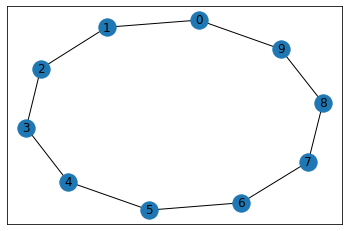

In [132]:
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

# a magic funtion that makes the plot output appear and stored within the notebook
%matplotlib inline

# the necessary funtion to plot/draw the nodes and its connections
nx.draw_networkx(G)
plt.show()

### Adding an edge 

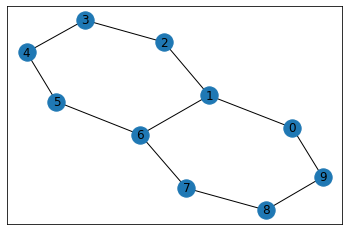

In [133]:
G.add_edge(1,6)
nx.draw_networkx(G)
plt.show()

### removing an edge 

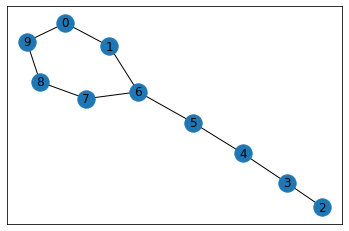

In [137]:
G.remove_edge(1,2)
nx.draw_networkx(G)
plt.show()